In [29]:
import pandas as pd
import xarray as xr
import numpy as np
import glob
import os


In [30]:
min_row = 21
min_col = 5
max_row = 25
max_col = 8

file_names = [f"r_{row:02}_c_{col:02}" for row in range(min_row, max_row+1) for col in range(min_col, max_col+1)]

file_names

['r_21_c_05',
 'r_21_c_06',
 'r_21_c_07',
 'r_21_c_08',
 'r_22_c_05',
 'r_22_c_06',
 'r_22_c_07',
 'r_22_c_08',
 'r_23_c_05',
 'r_23_c_06',
 'r_23_c_07',
 'r_23_c_08',
 'r_24_c_05',
 'r_24_c_06',
 'r_24_c_07',
 'r_24_c_08',
 'r_25_c_05',
 'r_25_c_06',
 'r_25_c_07',
 'r_25_c_08']

In [31]:
path = '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/'

# Add the path to the file names
file_paths = [f"{path}{file}_combined.nc" for file in file_names]

# Get the list of files that exist in the directory
existing_files = [file for file in file_paths if glob.glob(file)]
existing_files

['/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_21_c_05_combined.nc',
 '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_21_c_06_combined.nc',
 '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_21_c_07_combined.nc',
 '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_21_c_08_combined.nc',
 '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_22_c_05_combined.nc',
 '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_22_c_06_combined.nc',
 '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_22_c_07_combined.nc',
 '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_22_c_08_combined.nc',
 '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_23_c_05_combined.nc',
 '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_23_c_06_combined.nc',
 '/Volumes/Seagate/C

## Look at some individual cells. 
Yup, looks right. 

..except the axis ??!

In [251]:
# existing_files[6]
ds = xr.open_dataset(existing_files[6])
ds_mean = ds.mean(dim='time')
ds_mean

<xarray.Dataset>
Dimensions:  (x: 50, y: 50)
Coordinates:
  * x        (x) int64 -302475 -301475 -300475 ... -255475 -254475 -253475
  * y        (y) int64 -2283975 -2282975 -2281975 ... -2236975 -2235975 -2234975
Data variables:
    chla     (x, y) float64 1.416 1.462 1.468 1.465 ... 1.661 1.786 1.871 1.95

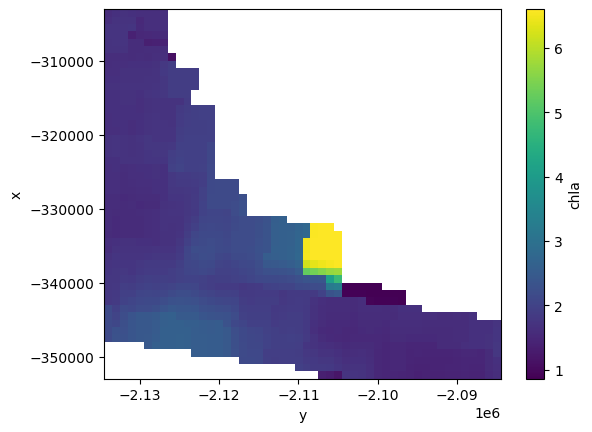

In [11]:
# r_25_c_06
ds = xr.open_dataset(existing_files[17])
ds_mean = ds.mean(dim='time')
ds_mean.chla.plot()

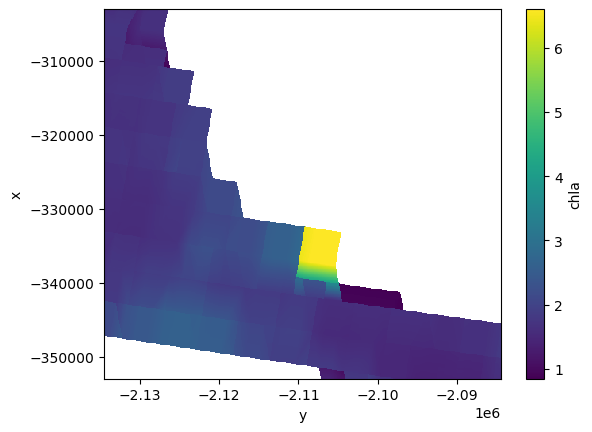

In [7]:
ds_mean.chla.plot()

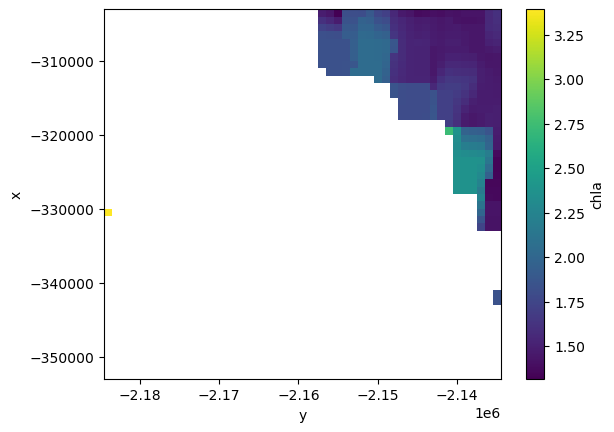

In [12]:
# r_24_c_06
ds = xr.open_dataset(existing_files[13])
ds_mean = ds.mean(dim='time')
ds_mean.chla.plot()

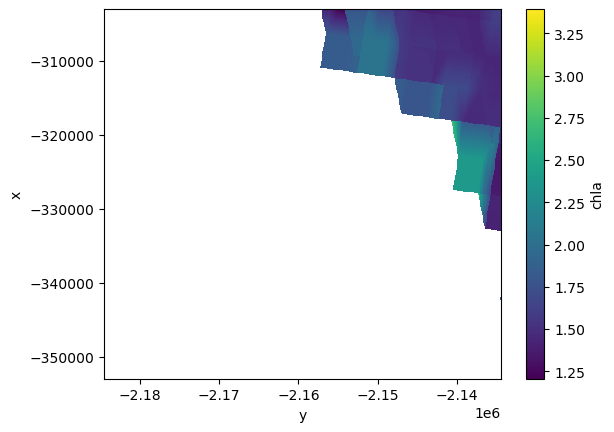

In [8]:
# r_24_c_06
ds = xr.open_dataset(existing_files[13])
ds_mean = ds.mean(dim='time')
ds_mean.chla.plot()

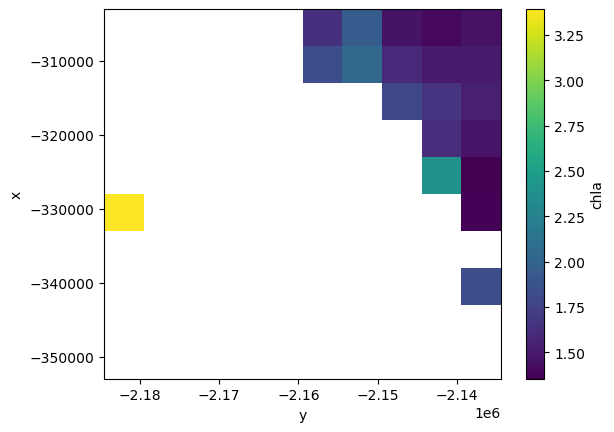

In [28]:
# r_24_c_06
ds = xr.open_dataset(existing_files[13])
ds_mean = ds.mean(dim='time')
ds_mean.chla.plot()

notice that the plot above and its array below are reflected. maybe this is normal

In [29]:
ds_mean

<xarray.Dataset>
Dimensions:  (x: 10, y: 10)
Coordinates:
  * x        (x) int64 -350475 -345475 -340475 ... -315475 -310475 -305475
  * y        (y) int64 -2181975 -2176975 -2171975 ... -2146975 -2141975 -2136975
Data variables:
    chla     (x, y) float64 nan nan nan nan nan ... 1.942 1.457 1.397 1.449

### Stitching didn't go as planned
maybe it has to do with the weird coords. 

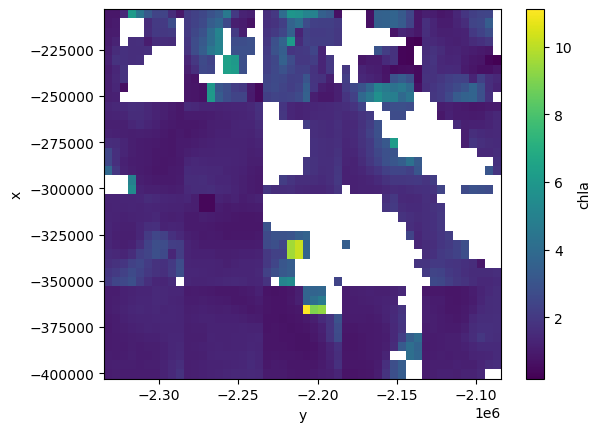

In [30]:
# conbine all the files into one by coords
ds = xr.open_mfdataset(existing_files, combine='by_coords')
ds_mean = ds.mean(dim='time')
ds_mean.chla.plot()

### Swap the axis in the data. 
then flip the plot and rotate it.
 
it works i guess????

In [13]:
import os
import xarray as xr

output_path = '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Transposed'

# Create the output path if it does not exist
os.makedirs(output_path, exist_ok=True)

print(len(existing_files), "files to process")

for file in existing_files:
    print(file)
    # Open the file as a dataset
    ds = xr.open_dataset(file)

    # Get the chla data and swap the x and y dimensions
    chla_data = ds.chla.values
    swapped_data = chla_data.swapaxes(1, 2)

    # Create a new DataArray with the swapped data and the original coordinates
    swapped_da = xr.DataArray(swapped_data, coords=ds.chla.coords, dims=ds.chla.dims)

    # Create a new Dataset from the DataArray
    swapped_ds = swapped_da.to_dataset(name='chla')

    # Get the base name of the file
    base_name = os.path.basename(file)

    # Create the output file path
    output_file = os.path.join(output_path, base_name)

    # Save the swapped dataset to a new file
    swapped_ds.to_netcdf(output_file)

20 files to process
/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_21_c_05_combined.nc
/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_21_c_06_combined.nc
/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_21_c_07_combined.nc
/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_21_c_08_combined.nc
/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_22_c_05_combined.nc
/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_22_c_06_combined.nc
/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_22_c_07_combined.nc
/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_22_c_08_combined.nc
/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_23_c_05_combined.nc
/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Combined/r_23_c_06_combined.nc
/Volumes/Seagate/CHANGES/data_repository

In [14]:
# glob all the files in output_path
transposed_files = glob.glob(f"{output_path}/*.nc")

In [ ]:
# conbine all the files into one by coords
ds = xr.open_mfdataset(transposed_files, combine='by_coords')
ds_mean = ds.mean(dim='time')
ds_mean.chla.plot()

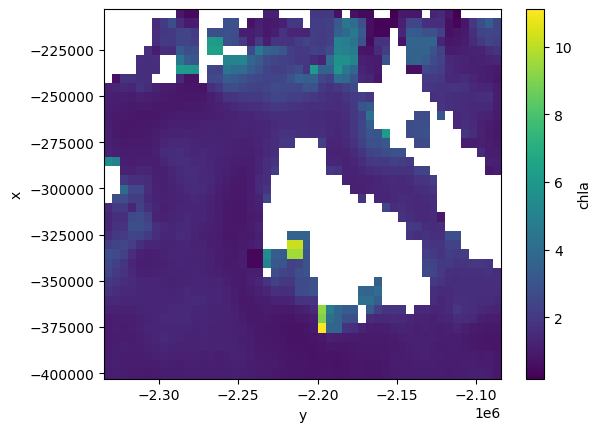

In [33]:
# conbine all the files into one by coords
ds = xr.open_mfdataset(transposed_files, combine='by_coords')
ds_mean = ds.mean(dim='time')
ds_mean.chla.plot()

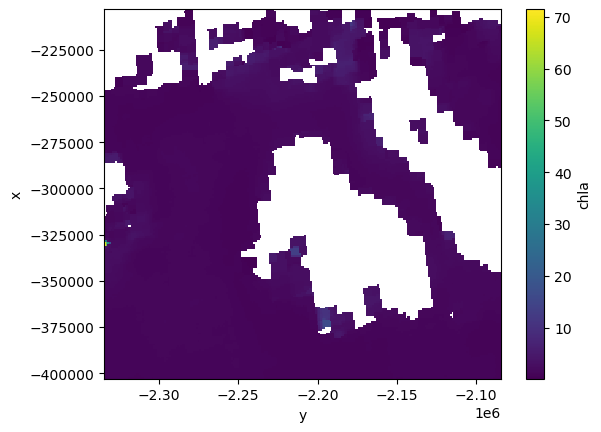

In [15]:
# conbine all the files into one by coords
ds = xr.open_mfdataset(transposed_files, combine='by_coords')
ds_mean = ds.mean(dim='time')
ds_mean.chla.plot()

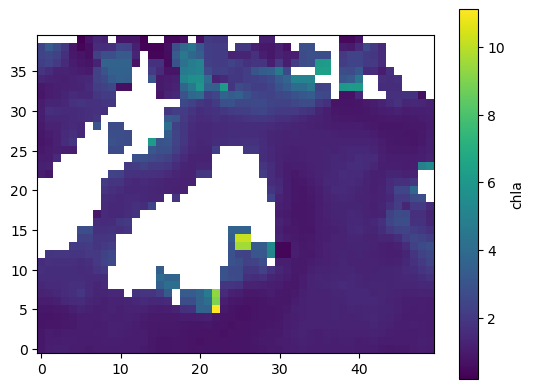

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Combine all the files into one by coords
ds = xr.open_mfdataset(transposed_files, combine='by_coords')

# Get the mean of the chla through time dimension
ds_mean = ds.mean(dim='time')

# Get the chla data as a 2D numpy array and flip it along the x-axis
chla_data = np.fliplr(ds_mean.chla.values)

# Create a new figure
plt.figure()

# Plot a heatmap of the mean chla
plt.imshow(chla_data, origin='lower')

# Add a colorbar
plt.colorbar(label='chla')

# Show the plot
plt.show()

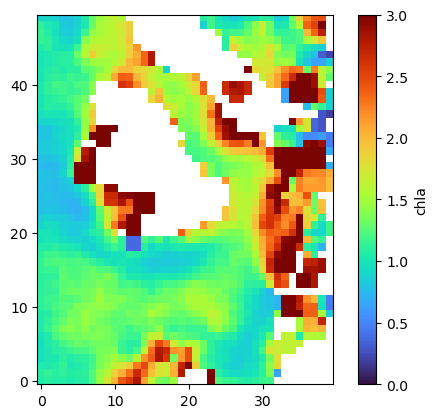

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Combine all the files into one by coords
ds = xr.open_mfdataset(transposed_files, combine='by_coords')

# Get the mean of the chla through time dimension
ds_mean = ds.mean(dim='time')

# Get the chla data as a 2D numpy array, flip it along the x-axis, and rotate 90 degrees clockwise
chla_data = np.fliplr(ds_mean.chla.values)
rotated_data = np.rot90(chla_data, 1)

# Create a new figure
plt.figure()

# Plot a heatmap of the mean chla
plt.imshow(rotated_data, origin='lower', cmap='turbo', vmin=0, vmax=3)

# Add a colorbar
plt.colorbar(label='chla')

# Show the plot
plt.show()

In [111]:
import matplotlib.pyplot as plt
import numpy as np

# Combine all the files into one by coords
ds = xr.open_mfdataset(transposed_files, combine='by_coords')

# Get the mean of the chla through time dimension
ds_mean = ds.mean(dim='time')

# Get the chla data as a 2D numpy array, flip it along the x-axis, and rotate 90 degrees clockwise
chla_data = np.fliplr(ds_mean.chla.values)
rotated_data = np.rot90(chla_data, 1)


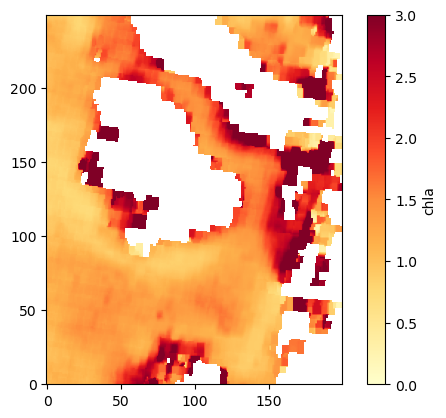

In [90]:

# Create a new figure
plt.figure()

# Plot a heatmap of the mean chla
plt.imshow(rotated_data, origin='lower', cmap='YlOrRd', vmin=0, vmax=3)

# Add a colorbar
plt.colorbar(label='chla')

# Show the plot
plt.show()

plt.close('all')

In [60]:
# # write rotated_data to netcdf 
# save_file = '/Volumes/Seagate/CHANGES/data_repository/plots/chla_mean.nc'

# ds = xr.Dataset(data_vars={'chla': (('y', 'x'), rotated_data)},
#                 coords={'y': ds_mean.y, 'x': ds_mean.x})
# ds.to_netcdf('/Volumes/Seagate/CHANGES/data_repository/plots/chla_mean.nc')




In [91]:
# Get a heatmap/array of the standard deviation of the chla through time
ds_std = ds.std(dim='time')
std_data = np.fliplr(ds_std.chla.values)
rotated_std = np.rot90(std_data, 1)

/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


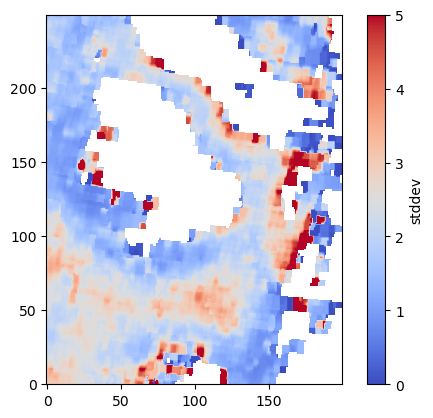

In [108]:

# Create a new figure
plt.figure()

# Plot a heatmap of the standard deviation of the chla
# plt.imshow(rotated_std, origin='lower', cmap='coolwarm', vmin=0, vmax=5)
plt.imshow(rotated_std, origin='lower', cmap='coolwarm', vmin=0, vmax=5)

# Add a colorbar
plt.colorbar(label='stddev')

# Show the plot
plt.show()

plt.close()

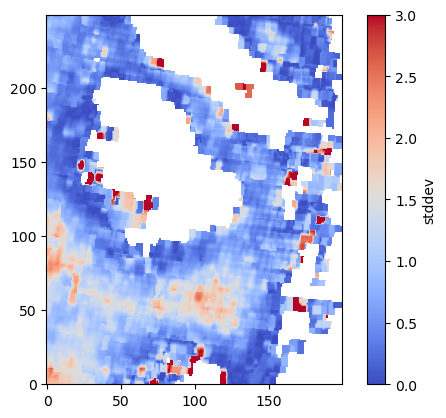

In [99]:
# caompare ds_std and ds_mean
plt.figure()
plt.imshow(abs(rotated_std-rotated_data), origin='lower', cmap='coolwarm', vmin=0, vmax=3)

plt.colorbar(label='stddev')
plt.show()


In [110]:
# write rotated_data to netcdf 
save_file = '/Volumes/Seagate/CHANGES/data_repository/plots/chla_std.nc'

ds = xr.Dataset(data_vars={'std': (('y', 'x'), rotated_std)},
                coords={'y': ds_std.y, 'x': ds_std.x})
ds.to_netcdf('/Volumes/Seagate/CHANGES/data_repository/plots/chla_std.nc')




## trends and r^2

In [113]:
import numpy as np

# Get the number of time points
n_time = ds['time'].size

# Flatten the data
flattened_data = ds.chla.values.flatten()

# Fit a linear regression model to the data
coeffs = np.polyfit(np.arange(len(flattened_data)), flattened_data, 1)

# Get the predicted values
predicted = np.polyval(coeffs, np.arange(len(flattened_data)))

# Calculate the residuals
residuals = flattened_data - predicted

# Calculate the total sum of squares
tss = np.sum((flattened_data - np.mean(flattened_data)) ** 2)

# Calculate the residual sum of squares
rss = np.sum(residuals ** 2)

# Calculate the R-squared values
r2 = 1 - (rss / tss)

# Print the R-squared value
print(r2)

# # Flip and rotate the R-squared values
r2_data = np.fliplr(r2)
rotated_r2 = np.rot90(r2_data, 1)

nan


In [114]:
r2_data = np.fliplr(r2)
rotated_r2 = np.rot90(r2_data, 1)

ValueError: Input must be >= 2-d.

In [ ]:
# plot the rotated_r2
plt.figure()
plt.imshow(rotated_r2, origin='lower', cmap='coolwarm', vmin=0, vmax=1)
plt.colorbar(label='R-squared')
plt.show()

plt.close()

# trendlines?

In [252]:
ds

<xarray.Dataset>
Dimensions:  (time: 9138, x: 50, y: 50)
Coordinates:
  * x        (x) int64 -302475 -301475 -300475 ... -255475 -254475 -253475
  * y        (y) int64 -2283975 -2282975 -2281975 ... -2236975 -2235975 -2234975
  * time     (time) int64 19980101 19980102 19980103 ... 20230130 20230131
Data variables:
    chla     (time, x, y) float64 nan nan nan nan nan ... nan nan nan nan nan

In [317]:
# create 'time.year' with the first 4 characters of time 
ds['time.year'] = ds.time.astype(str).str[:4]
annual_grouped = ds.groupby('time.year')

In [318]:
annual_grouped

DatasetGroupBy, grouped over 'time.year'
26 groups with labels '1998', '1999', ..., '2023'.

In [319]:
annual_grouped['1999']

<xarray.Dataset>
Dimensions:    (time: 362, x: 50, y: 50)
Coordinates:
  * x          (x) int64 -302475 -301475 -300475 ... -255475 -254475 -253475
  * y          (y) int64 -2283975 -2282975 -2281975 ... -2235975 -2234975
  * time       (time) int64 19990101 19990102 19990103 ... 19991230 19991231
Data variables:
    chla       (time, x, y) float64 nan nan nan nan nan ... nan nan nan nan nan
    time.year  (time) <U4 '1999' '1999' '1999' '1999' ... '1999' '1999' '1999'

In [320]:
# for each group, get the mean along the time dimension
annual_mean = annual_grouped.mean(dim='time')

In [321]:
annual_mean

<xarray.Dataset>
Dimensions:    (time.year: 26, x: 50, y: 50)
Coordinates:
  * x          (x) int64 -302475 -301475 -300475 ... -255475 -254475 -253475
  * y          (y) int64 -2283975 -2282975 -2281975 ... -2235975 -2234975
  * time.year  (time.year) object '1998' '1999' '2000' ... '2021' '2022' '2023'
Data variables:
    chla       (time.year, x, y) float64 0.8377 0.7727 0.7633 ... nan nan nan

In [322]:
# annual_slope = annual_mean.chla.dropna(dim='time.year').polyfit(dim='time.year', deg=1)
# print(annual_slope)

# calculate the slope of the annual mean at each pixel
annual_slope = annual_mean.chla.polyfit(dim='time.year', deg=1)
print(annual_slope)


<xarray.Dataset>
Dimensions:               (degree: 2, x: 50, y: 50)
Coordinates:
  * degree                (degree) int64 1 0
  * x                     (x) int64 -302475 -301475 -300475 ... -254475 -253475
  * y                     (y) int64 -2283975 -2282975 ... -2235975 -2234975
Data variables:
    polyfit_coefficients  (degree, x, y) float64 -0.0003778 0.0001796 ... -2.046


In [323]:
slope_coeffs = annual_slope.polyfit_coefficients.sel(degree=1)
print(slope_coeffs)
# # Get the data as a 2D numpy array, flip it along the x-axis, and rotate 90 degrees clockwise
# data = np.fliplr(slope_coeffs.values)
# rotated_data = np.rot90(data, 1)


<xarray.DataArray 'polyfit_coefficients' (x: 50, y: 50)>
array([[-3.77812668e-04,  1.79648633e-04,  3.01069232e-04, ...,
        -1.55055630e-03,  7.01877783e-03,  7.39227018e-03],
       [-1.42538230e-04,  8.48673023e-05,  5.65638310e-04, ...,
        -1.87182181e-03,  7.76941395e-03,  8.52643622e-03],
       [-5.47155877e-04,  7.55937869e-05,  7.63691071e-04, ...,
        -7.46383333e-04, -1.24626207e-03,  8.89136104e-03],
       ...,
       [ 5.79373199e-03, -1.15472535e-02, -1.15100272e-02, ...,
         6.83853361e-03,  7.16025857e-03,  6.79030520e-03],
       [-9.23937337e-03, -1.05270522e-02, -9.60708912e-03, ...,
         3.57477635e-03,  4.08785246e-03,  1.76911509e-03],
       [-2.79215104e-01, -9.08181962e-03, -9.05415444e-03, ...,
         2.27620156e-03,  3.78679001e-03,  1.95967221e-03]])
Coordinates:
    degree   int64 1
  * x        (x) int64 -302475 -301475 -300475 ... -255475 -254475 -253475
  * y        (y) int64 -2283975 -2282975 -2281975 ... -2236975 -2235975 -2234

In [324]:
slope_coeffs[0,0]

<xarray.DataArray 'polyfit_coefficients' ()>
array(-0.00037781)
Coordinates:
    degree   int64 1
    x        int64 -302475
    y        int64 -2283975

In [222]:
annual_slope

<xarray.Dataset>
Dimensions:               (degree: 2, x: 50, y: 50)
Coordinates:
  * degree                (degree) int64 1 0
  * x                     (x) int64 -302475 -301475 -300475 ... -254475 -253475
  * y                     (y) int64 -2283975 -2282975 ... -2235975 -2234975
Data variables:
    polyfit_coefficients  (degree, x, y) float64 -0.0003778 0.0001796 ... -2.046

In [301]:
slope_coeffs = annual_slope.polyfit_coefficients
# slope_coeffs[0,0]
slope_coeffs[:,0,0].values[0]


-0.07516480385605936

In [325]:
slope_coeffs = annual_slope.polyfit_coefficients.sel(degree=1)
y_intercepts = annual_slope.polyfit_coefficients.sel(degree=0)

In [329]:
slope_coeffs[0,0].values


array(-0.00037781)

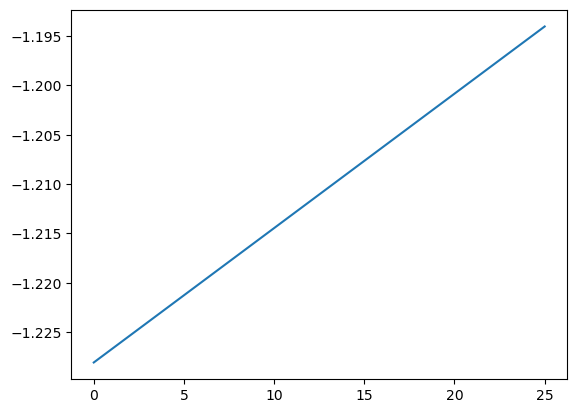

In [332]:
# get the polyfit_coefficients for the first pixel

m = slope_coeffs[3,2].values
b = y_intercepts[3,2].values

x_val = np.arange(0, 26)
y_val = m*x_val + b

# plot the line
plt.figure()
plt.plot(x_val, y_val)
plt.show()

In [246]:
b

0.013734099238386881

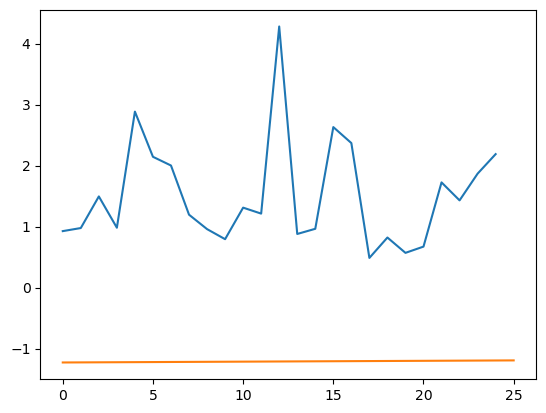

In [333]:
# plot the annual_grouped of the first pixles through time
plt.figure()
plt.plot(annual_mean.chla[:,3,2])

plt.plot(x_val, y_val)
plt.show()


plt.close()

In [163]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import xarray as xr
import numpy as np

# Define a function to calculate the R-squared value of a linear regression
def calc_r2(y, x):
    # Drop NaN values
    non_nan_indices = ~np.isnan(y) & ~np.isnan(x)
    y = y[non_nan_indices]
    x = x[non_nan_indices]

    # Check if y and x are empty
    if y.size == 0 or x.size == 0:
        return np.nan

    # Fit the model and calculate the R-squared value
    model = LinearRegression().fit(x.reshape(-1, 1), y)
    return r2_score(y, model.predict(x.reshape(-1, 1)))

# Apply the function to each pixel
r2 = xr.apply_ufunc(calc_r2, annual_mean['chla'].load(), predicted['polyfit_coefficients'].load(), 
                    input_core_dims=[['time.year'], ['time.year']], vectorize=True)

# Print the R-squared values
print(r2)

/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/sklearn/

<xarray.DataArray (x: 200, y: 250)>
array([[1.33514544e-03, 6.14817902e-05, 2.90544113e-04, ...,
        1.58458861e-03, 5.03957165e-06, 8.79179956e-04],
       [6.11623822e-03, 2.58851015e-03, 3.09267493e-03, ...,
        4.00027760e-02, 1.31568010e-02, 5.14243546e-03],
       [7.36569313e-03, 5.63814960e-03, 5.79998388e-03, ...,
        4.65059231e-02, 4.79725268e-02, 4.76447270e-02],
       ...,
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan]])
Coordinates:
  * x        (x) int64 -402475 -401475 -400475 ... -205475 -204475 -203475
  * y        (y) int64 -2333975 -2332975 -2331975 ... -2086975 -2085975 -2084975
    degree   int64 1


/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/sklearn/

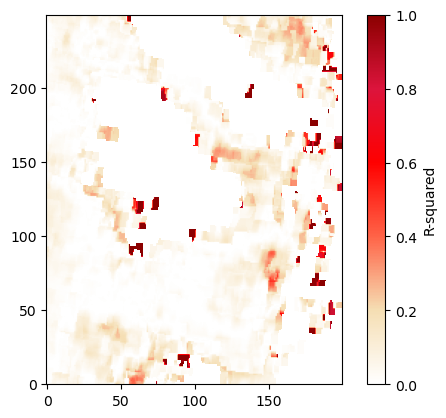

In [201]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Define the colors for the negative, neutral, and positive ranges
cmap_new = colors.LinearSegmentedColormap.from_list("", ["white","wheat","tomato", "red",  "crimson", "darkred"])

# Create a normalizer
norm_new = colors.TwoSlopeNorm(vmin=0, vcenter=0.5, vmax=1)

# Plot the data
plt.figure()
plt.imshow(rotated_r2, origin='lower', cmap=cmap_new, norm=norm_new)
plt.colorbar(label='R-squared')
plt.show()

In [203]:
# write rotated_data to netcdf
ds = xr.Dataset(data_vars={'r2': (('y', 'x'), rotated_r2)},
                coords={'y': r2.y, 'x': r2.x})
ds.to_netcdf('/Volumes/Seagate/CHANGES/data_repository/plots/slope_r2.nc')


In [176]:
# print min value of r2 that is not nan
r2_min = np.nanmin(r2)
print("{:.18f}".format(r2_min))


0.000000000003250622


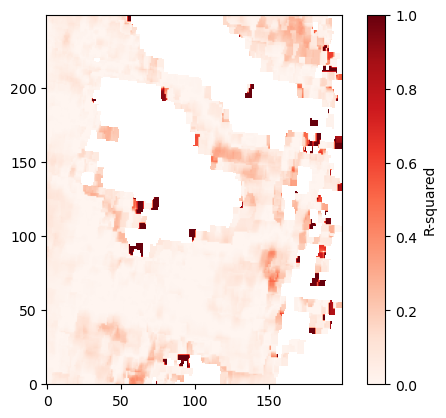

In [180]:
# plot the rotated_r2

data = np.fliplr(r2.values)
rotated_r2 = np.rot90(data, 1)

plt.figure()
plt.imshow(rotated_r2, origin='lower', cmap='Reds', vmin=0, vmax=1)
plt.colorbar(label='R-squared')
plt.show()


In [170]:
print(predicted)

<xarray.Dataset>
Dimensions:               (x: 200, y: 250, time.year: 26)
Coordinates:
    degree                int64 1
  * x                     (x) int64 -402475 -401475 -400475 ... -204475 -203475
  * y                     (y) int64 -2333975 -2332975 ... -2085975 -2084975
  * time.year             (time.year) int64 1998 1999 2000 ... 2021 2022 2023
Data variables:
    polyfit_coefficients  (x, y, time.year) float64 5.804 5.807 5.81 ... nan nan


In [ ]:
# get the r^2 between annual_grouped and the predicted values of annual_slope, slope_coeffs

In [146]:
annual_slope


<xarray.Dataset>
Dimensions:               (degree: 2, x: 200, y: 250)
Coordinates:
  * degree                (degree) int64 1 0
  * x                     (x) int64 -402475 -401475 -400475 ... -204475 -203475
  * y                     (y) int64 -2333975 -2332975 ... -2085975 -2084975
Data variables:
    polyfit_coefficients  (degree, x, y) float64 dask.array<chunksize=(2, 10, 250), meta=np.ndarray>

/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xa

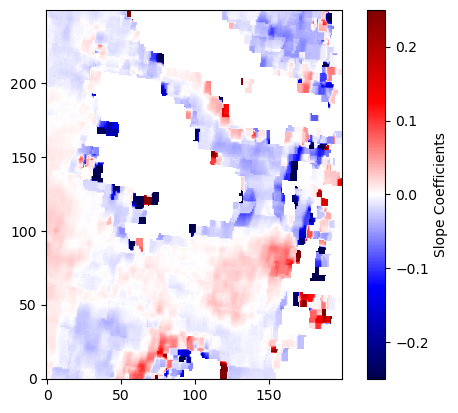

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Select the slope coefficients
slope_coeffs = annual_slope.polyfit_coefficients.sel(degree=1)

# Get the data as a 2D numpy array, flip it along the x-axis, and rotate 90 degrees clockwise
data = np.fliplr(slope_coeffs.values)
rotated_data = np.rot90(data, 1)

# Create a new figure
plt.figure()

# Plot a heatmap of the rotated data
plt.imshow(rotated_data, origin='lower', cmap='seismic', vmin=-.25, vmax=.25)

# Add a colorbar
plt.colorbar(label='Slope Coefficients')

# Show the plot
plt.show()

In [28]:
# write rotated_data to netcdf
ds = xr.Dataset(data_vars={'slope': (('y', 'x'), rotated_data)},
                coords={'y': annual_slope.y, 'x': annual_slope.x})
ds.to_netcdf('/Volumes/Seagate/CHANGES/data_repository/plots/slope_coefficients.nc')


In [129]:
asf = ds.groupby('time.year')

In [134]:
# conbine all the files into one by coords
ds = xr.open_mfdataset(transposed_files, combine='by_coords')

# create 'time.year' with the first 4 characters of time 
ds['time.year'] = ds.time.astype(str).str[:4]
annual_grouped = ds.groupby('time.year')

In [135]:
import xarray as xr
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Convert 'time' to datetime
ds['time'] = pd.to_datetime(ds['time'].values.astype(str))

# Define a function to calculate the R-squared value of a linear regression
def calc_r2(y):
    # Drop NaN values
    non_nan_indices = ~y.isnull()
    y = y.where(non_nan_indices)
    x = slope_coeffs.where(non_nan_indices)

    # Reshape y and x to 1D arrays
    y = y.values.flatten()
    x = x.values.flatten()

    # Remove NaN values from y and x
    y = y[~np.isnan(y)]
    x = x[~np.isnan(x)]

    model = LinearRegression().fit(x.reshape(-1, 1), y)
    return xr.DataArray(r2_score(y, model.predict(x.reshape(-1, 1))))

# Apply the function to each pixel over time
r2 = ds['chla'].groupby('time.year').apply(calc_r2)

# Print the R-squared values
print(r2)

/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xa

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by LinearRegression.

In [131]:
print(ds)

<xarray.Dataset>
Dimensions:    (x: 200, y: 250, time: 9138)
Coordinates:
  * x          (x) int64 -402475 -401475 -400475 ... -205475 -204475 -203475
  * y          (y) int64 -2333975 -2332975 -2331975 ... -2085975 -2084975
  * time       (time) int64 19980101 19980102 19980103 ... 20230130 20230131
Data variables:
    chla       (time, x, y) float64 dask.array<chunksize=(9138, 50, 50), meta=np.ndarray>
    time.year  (time) <U4 '1998' '1998' '1998' '1998' ... '2023' '2023' '2023'


/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xa

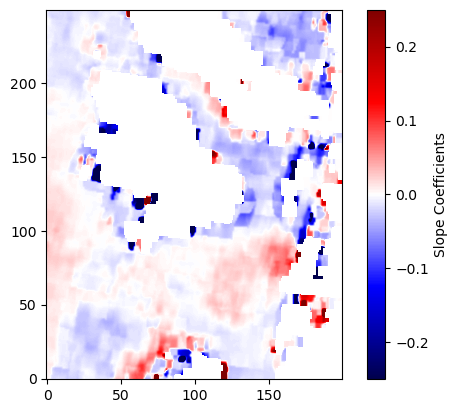

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Select the slope coefficients
slope_coeffs = annual_slope.polyfit_coefficients.sel(degree=1)

# Get the data as a 2D numpy array, flip it along the x-axis, and rotate 90 degrees clockwise
data = np.fliplr(slope_coeffs.values)
rotated_data = np.rot90(data, 1)

# Create a new figure
plt.figure()

# Plot a heatmap of the rotated data with interpolation
plt.imshow(rotated_data, origin='lower', cmap='seismic', vmin=-.25, vmax=.25, interpolation='bicubic')

# Add a colorbar
plt.colorbar(label='Slope Coefficients')

# Show the plot
plt.show()

/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xa

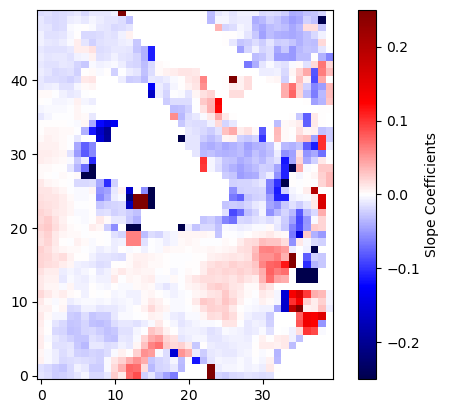

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Select the slope coefficients
slope_coeffs = annual_slope.polyfit_coefficients.sel(degree=1)

# Get the data as a 2D numpy array, flip it along the x-axis, and rotate 90 degrees clockwise
data = np.fliplr(slope_coeffs.values)
rotated_data = np.rot90(data, 1)

# Create a new figure
plt.figure()

# Plot a heatmap of the rotated data
plt.imshow(rotated_data, origin='lower', cmap='seismic', vmin=-.25, vmax=.25)

# Add a colorbar
plt.colorbar(label='Slope Coefficients')

# Show the plot
plt.show()

In [ ]:
# get the annual_mean values for index [0,0] for each year as a dictionary
annual_mean_values = {year: annual_mean.chla.isel(x=0, y=0).sel({'time.year': year}).values for year in annual_mean['time.year'].values}

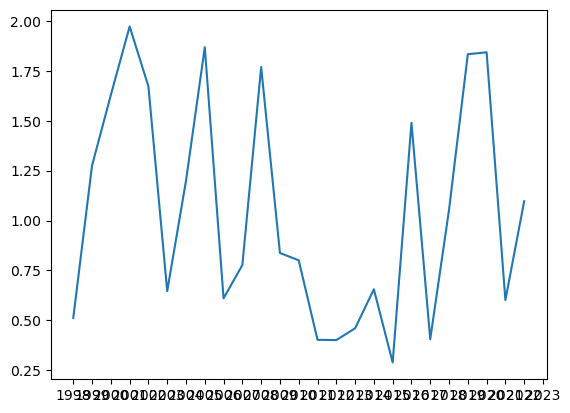

In [ ]:
# plot annual_mean_values for the first pixel
plt.plot(annual_mean_values.keys(), annual_mean_values.values())
plt.show()


In [ ]:
#`linregress(years, values)` calculates the least-squares regression for the years and values. 
# The `slope` and `intercept` are the parameters of the trendline.

from scipy.stats import linregress

# Extract years and values from the dictionary
years = list(annual_mean_values.keys())
values = list(annual_mean_values.values())

# Remove pairs where value is NaN
pairs = [(year, value) for year, value in zip(years, values) if not np.isnan(value)]
years, values = zip(*pairs)

# Calculate the trendline
slope, intercept, r_value, p_value, std_err = linregress(years, values)

# Print the equation of the trendline
print(f"y = {slope} * x + {intercept}")

UFuncTypeError: ufunc 'maximum' did not contain a loop with signature matching types (dtype('<U4'), dtype('<U4')) -> None

In [ ]:
annual_mean

<xarray.Dataset>
Dimensions:    (x: 40, y: 50, time.year: 26)
Coordinates:
  * x          (x) int64 -400475 -395475 -390475 ... -215475 -210475 -205475
  * y          (y) int64 -2331975 -2326975 -2321975 ... -2091975 -2086975
  * time.year  (time.year) int64 1998 1999 2000 2001 ... 2020 2021 2022 2023
Data variables:
    chla       (time.year, x, y) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>

### get the slopes of the trends for all pixels. 

End result looks exactly the same as the polyfit that warned about being super ill conditioned except this method is super slow and polyfit ran fast. 

In [ ]:
from scipy.stats import linregress

# Initialize a 2D matrix for the slopes
slopes = np.empty((40, 50))

# Iterate over the 'x' and 'y' dimensions
for i in range(40):
    for j in range(50):
        # Get the annual_mean values for the current pixel for each year
        annual_mean_values = {year: annual_mean.chla.isel(x=i, y=j).sel({'time.year': year}).values for year in annual_mean['time.year'].values}

        # Extract years and values from the dictionary
        years = list(annual_mean_values.keys())
        values = list(annual_mean_values.values())

        # Remove pairs where value is NaN
        pairs = [(year, value) for year, value in zip(years, values) if not np.isnan(value)]

        # Skip the calculation if all values are NaN
        if not pairs:
            slopes[i, j] = np.nan
            continue

        years, values = zip(*pairs)

        # Calculate the trendline
        slope, intercept, r_value, p_value, std_err = linregress(years, values)

        # Store the slope in the matrix
        slopes[i, j] = slope

# Print the slopes matrix
print(slopes)

UFuncTypeError: ufunc 'maximum' did not contain a loop with signature matching types (dtype('<U4'), dtype('<U4')) -> None

/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xarray/core/nputils.py:169: RankWarning: Polyfit may be poorly conditioned
  warn_on_deficient_rank(rank, x.shape[1])
/Users/tara/opt/anaconda3/envs/changes/lib/python3.11/site-packages/xa

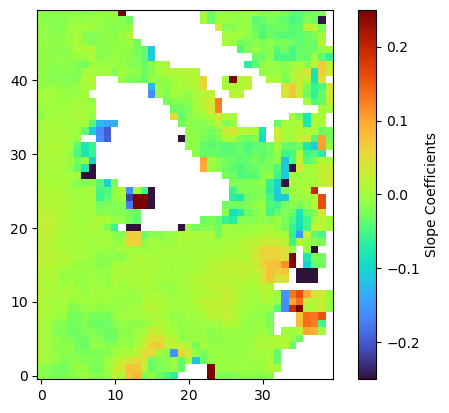

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select the slope coefficients
slope_coeffs = annual_slope.polyfit_coefficients.sel(degree=1)

# Get the data as a 2D numpy array, flip it along the x-axis, and rotate 90 degrees clockwise
data = np.fliplr(slope_coeffs.values)
rotated_data = np.rot90(data, 1)

# Create a new figure
plt.figure()

# Plot a heatmap of the rotated data
plt.imshow(rotated_data, origin='lower', cmap='turbo', vmin=-.25, vmax=.25)

# Add a colorbar
plt.colorbar(label='Slope Coefficients')

# Show the plot
plt.show()

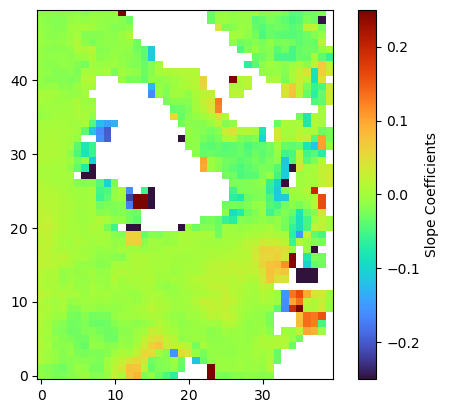

In [ ]:
# plot slopes as heatmap. first flip across the x axis, then rotate 90 degrees clockwise
plt.imshow(np.rot90(np.fliplr(slopes)), origin='lower', cmap='turbo', vmin=-.25, vmax=.25)
plt.colorbar(label='Slope Coefficients')
plt.show()



In [26]:
# plot slopes as heatmap. first flip across the x axis, then rotate 90 degrees clockwise
plt.imshow(np.rot90(np.fliplr(slopes)), origin='lower', cmap='seismic', vmin=-1, vmax=1)
plt.colorbar(label='Slope Coefficients')
plt.show()



NameError: name 'slopes' is not defined

In [ ]:
annual_mean.chla

<xarray.DataArray 'chla' (time.year: 26, x: 40, y: 50)>
dask.array<concatenate, shape=(26, 40, 50), dtype=float64, chunksize=(1, 10, 10), chunktype=numpy.ndarray>
Coordinates:
  * x          (x) int64 -400475 -395475 -390475 ... -215475 -210475 -205475
  * y          (y) int64 -2331975 -2326975 -2321975 ... -2091975 -2086975
  * time.year  (time.year) object '1998' '1999' '2000' ... '2021' '2022' '2023'

lol no